In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train = r"C:\Users\YN\OneDrive\Desktop\Course content\Assignment 9\cats and dogs\cats and dogs\test_set"
test = r"C:\Users\YN\OneDrive\Desktop\Course content\Assignment 9\cats and dogs\cats and dogs\training_set"

In [9]:
def load_images(directory, img_size=(64, 64)):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir): 
            continue
        for image_file in os.listdir(label_dir):
            # Skip non-image files (like .DS_Store)
            if image_file.startswith("."):
                continue
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                labels.append(label)
    return images, labels

In [11]:
X_train, y_train = load_images(r"C:\Users\YN\OneDrive\Desktop\Course content\Assignment 9\cats and dogs\cats and dogs\test_set")
X_test, y_test = load_images(r"C:\Users\YN\OneDrive\Desktop\Course content\Assignment 9\cats and dogs\cats and dogs\training_set")

In [15]:
X_train = np.array(X_train)
print("Training Data Shape:", X_train.shape)

Training Data Shape: (2000, 64, 64)


In [19]:
y_train = np.array(y_train)
print("Training Labels Shape:", y_train.shape)

Training Labels Shape: (2000,)


In [23]:
X_test = np.array(X_test)
print("Testing Data Shape:", X_test.shape)

Testing Data Shape: (8000, 64, 64)


In [25]:
y_test = np.array(y_test)
print("Testing Labels Shape:", y_test.shape)

Testing Labels Shape: (8000,)


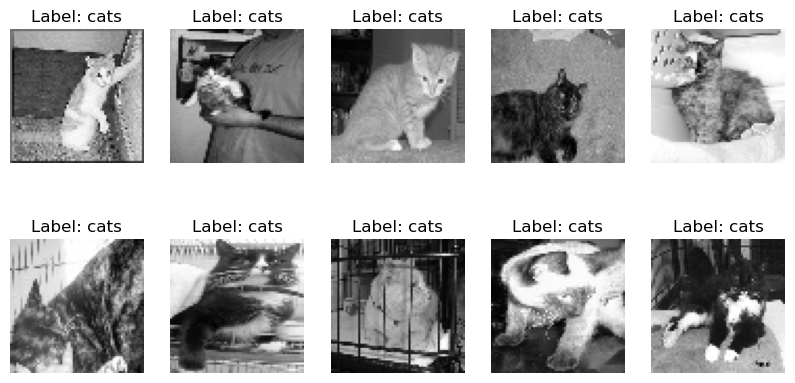

In [27]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [31]:
# Add a channel dimension for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [33]:
# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [39]:
# One-hot encode labels for deep learning
y_train_cat = to_categorical(y_train_encoded, num_classes=2)  # 2 classes: cat and dog

In [37]:
y_test_cat = to_categorical(y_test_encoded, num_classes=2)

In [41]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [43]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_flat, y_train_encoded)
y_pred_lr = model_lr.predict(X_test_flat)
print("Logistic Regression Accuracy:", accuracy_score(y_test_encoded, y_pred_lr))

Logistic Regression Accuracy: 0.523625


In [45]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_flat, y_train_encoded)
y_pred_rf = model_rf.predict(X_test_flat)
print("Random Forest Accuracy:", accuracy_score(y_test_encoded, y_pred_rf))

Random Forest Accuracy: 0.615625


In [47]:
# Build ANN Model
model_ann = Sequential([
    Flatten(input_shape=(64, 64, 1)),  # Flatten the 64x64 image
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')  # 2 output classes (cat and dog)
])

C:\Users\YN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
# Compile the Model
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# Train the Model
history_ann = model_ann.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5064 - loss: 1.0672 - val_accuracy: 0.0000e+00 - val_loss: 0.9319
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5614 - loss: 0.7042 - val_accuracy: 0.0000e+00 - val_loss: 0.9712
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6091 - loss: 0.6791 - val_accuracy: 0.0000e+00 - val_loss: 0.9543
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6132 - loss: 0.6704 - val_accuracy: 0.0000e+00 - val_loss: 1.0043
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6175 - loss: 0.6569 - val_accuracy: 0.0000e+00 - val_loss: 0.9266
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6174 - loss: 0.6630 - val_accuracy: 0.0000e+00 - val_loss: 0.9101
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6238 - loss: 0.6522 - val_accuracy: 0.0000e+00 - val_loss: 0.8580
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6427 - loss: 0.6504 - val_

In [53]:
# Evaluate the Model
loss, accuracy = model_ann.evaluate(X_test, y_test_cat)
print("ANN Accuracy:", accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.5373
ANN Accuracy: 0.5


In [55]:
# Build CNN Model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 output classes (cat and dog)
])

# Compile the Model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history_cnn = model_cnn.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the Model
loss, accuracy = model_cnn.evaluate(X_test, y_test_cat)
print("CNN Accuracy:", accuracy)

Epoch 1/10


C:\Users\YN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6191 - loss: 0.7127 - val_accuracy: 0.0000e+00 - val_loss: 0.8944
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6186 - loss: 0.6429 - val_accuracy: 0.0325 - val_loss: 0.9055
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6354 - loss: 0.6268 - val_accuracy: 0.0125 - val_loss: 1.1738
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6630 - loss: 0.5939 - val_accuracy: 0.5175 - val_loss: 0.7965
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7153 - loss: 0.5501 - val_accuracy: 0.5825 - val_loss: 0.7809
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7645 - loss: 0.5095 - val_accuracy: 0.5075 - val_loss: 0.8594
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8013 - loss: 0.4520 - val_accuracy: 0.7000 - val_loss: 0.6930
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8254 - loss: 0.4118 - val_accuracy: 0.4700 - val_loss

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


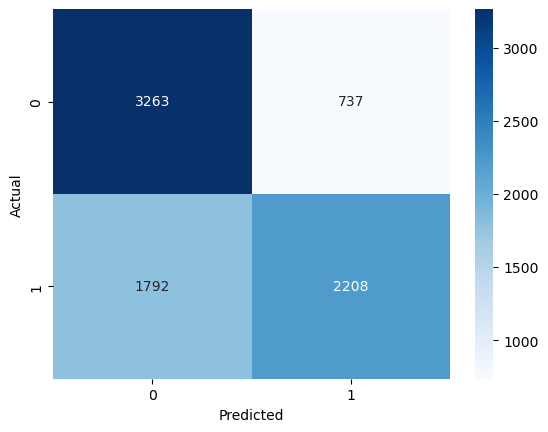

In [57]:
y_pred_cnn = model_cnn.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

conf_matrix = confusion_matrix(y_test_encoded, y_pred_cnn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

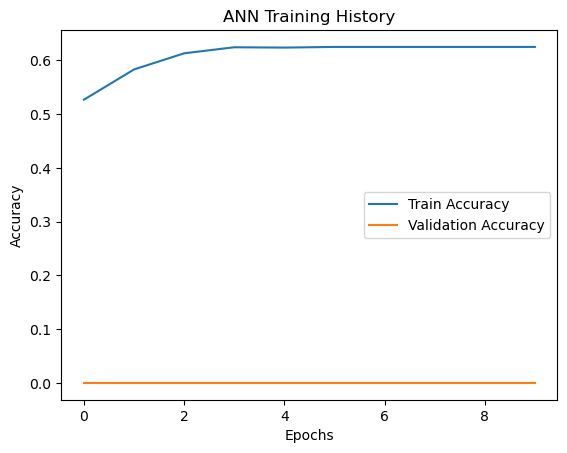

In [59]:
# Plot ANN Training History
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


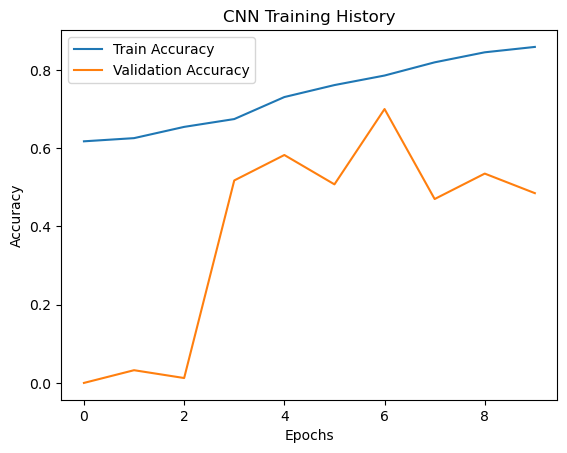

In [61]:
# Plot CNN Training History
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
model_cnn.save('cat_dog_cnn_model.h5')

In [65]:
from tensorflow.keras.models import load_model

# Load the Model
loaded_model = load_model('cat_dog_cnn_model.h5')

# Make Predictions
new_image = X_test[0].reshape(1, 64, 64, 1)  # Reshape for prediction
prediction = loaded_model.predict(new_image)
predicted_class = np.argmax(prediction, axis=1)
print("Predicted Class:", label_encoder.inverse_transform(predicted_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Class: ['cats']


In [67]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator
datagen.fit(X_train)

# Train the CNN model with augmented data
history_cnn_aug = model_cnn.fit(datagen.flow(X_train, y_train_cat, batch_size=32), epochs=10, validation_data=(X_test, y_test_cat))

Epoch 1/10


C:\Users\YN\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.6005 - loss: 0.7261 - val_accuracy: 0.6401 - val_loss: 0.6442
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5858 - loss: 0.6761 - val_accuracy: 0.6585 - val_loss: 0.6211
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6302 - loss: 0.6481 - val_accuracy: 0.6441 - val_loss: 0.6182
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6225 - loss: 0.6481 - val_accuracy: 0.6535 - val_loss: 0.6200
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6243 - loss: 0.6470 - val_accuracy: 0.7009 - val_loss: 0.5821
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6241 - loss: 0.6540 - val_accuracy: 0.6750 - val_loss: 0.5961
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6523 - loss: 0.6236 - val_accuracy: 0.7216 - val_loss: 0.5864
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6425 - loss: 0.6379 - val_accuracy: 0.6532 - val_loss: 0.